In [17]:
import numpy as np
import pandas as pd
import sklearn as sl
import matplotlib as mp
import scipy as cp
import seaborn as sb
from matplotlib import pyplot as plt
from math import sqrt
import warnings

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.sandbox.regression.gmm import IV2SLS 
from statsmodels.sandbox.regression.gmm import GMM
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import f1_score, recall_score, precision_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, confusion_matrix, classification_report
from sklearn import linear_model as lm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from scipy.linalg import toeplitz

In [18]:
df = pd.read_csv(r"C:\Users\johns\OneDrive\Desktop\MBAN Semester 2\Predictive Analytics\Hackathon\Hackathon\TEST_XYZ_Sportswear_Orders_Dataset.csv")

In [19]:
df.head(20)

,Order Date,Requested Delivery Date,Customer Country Code,Product Code,Description,Order Type,Customer Order Code,Value,Currency,Items,Route
0,01.01.2009,18.02.2009,DE,PK003,Basic Parka,VO,COD00001,269.87,EUR,8,East
1,01.01.2009,10.02.2009,FR,PK001,Premium Parka,VO,COD00002,170.34,EUR,2,West
2,01.01.2009,17.01.2009,ES,PK002,Basic Parka,VO,COD00003,61.09,EUR,7,West
3,03.01.2009,28.01.2009,IT,PK003,Advanced Parka,VO,COD00004,251.18,EUR,6,North
4,03.01.2009,18.01.2009,DE,PK004,Premium Parka,VO,COD00005,153.33,EUR,5,West
5,03.01.2009,14.01.2009,ES,PK001,Premium Parka,VO,COD00006,196.87,EUR,2,West
6,03.01.2009,27.02.2009,ES,PK003,Advanced Parka,VO,COD00007,90.85,EUR,3,West
7,03.01.2009,08.01.2009,DE,PK003,Premium Parka,VO,COD00008,164.53,EUR,9,West
8,04.01.2009,25.01.2009,IT,PK004,Premium Parka,VO,COD00009,110.15,EUR,6,East
9,04.01.2009,15.02.2009,RU,PK004,Advanced Parka,VO,COD00010,124.43,EUR,6,West


In [20]:
df.tail()

,Order Date,Requested Delivery Date,Customer Country Code,Product Code,Description,Order Type,Customer Order Code,Value,Currency,Items,Route
2416,28.12.2011,30.01.2012,GB,PK002,Advanced Parka,VO,COD02417,130.92,EUR,16,West
2417,28.12.2011,19.01.2012,IT,PK004,Advanced Parka,VO,COD02418,286.23,EUR,11,North
2418,29.12.2011,04.02.2012,IT,PK002,Premium Parka,VO,COD02419,249.23,EUR,14,West
2419,29.12.2011,10.01.2012,RU,PK004,Basic Parka,VO,COD02420,201.59,EUR,16,West
2420,30.12.2011,04.02.2012,IT,PK001,Basic Parka,VO,COD02421,205.67,EUR,13,North


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order Date               2421 non-null   object 
 1   Requested Delivery Date  2421 non-null   object 
 2   Customer Country Code    2421 non-null   object 
 3   Product Code             2421 non-null   object 
 4   Description              2421 non-null   object 
 5   Order Type               2421 non-null   object 
 6   Customer Order Code      2421 non-null   object 
 7   Value                    2421 non-null   float64
 8   Currency                 2421 non-null   object 
 9   Items                    2421 non-null   int64  
 10  Route                    2421 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 208.2+ KB


In [22]:
import pandas as pd

# Assuming df is your DataFrame
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce', format='%d.%m.%Y')

# The 'errors' parameter is set to 'coerce' to handle any parsing errors by replacing them with NaT (Not a Time).


Change dates to Dtype Datetime

In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Requested Delivery Date'] = pd.to_datetime(df['Requested Delivery Date'])

C:\Users\johns\AppData\Local\Temp\ipykernel_36480\3087183724.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Requested Delivery Date'] = pd.to_datetime(df['Requested Delivery Date'])


Drop Duplicates

In [24]:
df.drop_duplicates(inplace=True)

Check for NAN Values

In [25]:
nan_values = df.isna().sum()
print("NaN values per column:")
print(nan_values)

NaN values per column:
Order Date                 0
Requested Delivery Date    0
Customer Country Code      0
Product Code               0
Description                0
Order Type                 0
Customer Order Code        0
Value                      0
Currency                   0
Items                      0
Route                      0
dtype: int64


Drop a specific column id

In [ ]:
#df.drop(969, axis = 0, inplace = True)

# Model Building

### Check for Stationarity

Version 1

In [26]:
# Sort the DataFrame by date if it's not already sorted
df.sort_values(by='Order Date', inplace=True)

# Assuming 'Items' is the column you want to check for stationarity
items_column = 'Items'

# Perform Dickey-Fuller test
result = adfuller(df[items_column])

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Check for stationarity based on p-value
if result[1] <= 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely non-stationary.")

ADF Statistic: -2.847368712369657
p-value: 0.05181955502912162
Critical Values: {'1%': -3.4330708189719914, '5%': -2.862742022728184, '10%': -2.567409886740616}
The time series is likely non-stationary.


Version 2

In [27]:
test_result=adfuller(df['Items'])

In [28]:
def adfuller_test(Items):
    df.sort_values(by='Order Date', inplace=True)
    result=adfuller(Items)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [29]:
adfuller_test(df['Items'])

ADF Test Statistic : -2.847368712369657
p-value : 0.05181955502912162
#Lags Used : 14
Number of Observations Used : 2406
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

To be used if the data is not stationary

In [30]:
df['Items First Difference'] = df['Items'] - df['Items'].shift(1)

In [31]:
df['Items'].shift(1)

0        NaN
1        8.0
2        2.0
3        7.0
4        6.0
        ... 
2416    17.0
2417    16.0
2418    11.0
2419    14.0
2420    16.0
Name: Items, Length: 2421, dtype: float64

In [32]:
df['Seasonal Difference']=df['Items']-df['Items'].shift(12)

In [33]:
## Again test dickey fuller test
adfuller_test(df['Seasonal Difference'].dropna())

ADF Test Statistic : -10.256790874429178
p-value : 4.340114187286938e-18
#Lags Used : 26
Number of Observations Used : 2382
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: >

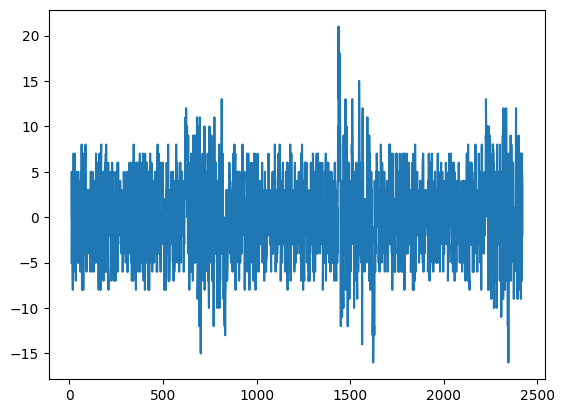

In [34]:
df['Seasonal Difference'].plot()

### Autocorrelation Model

Final Thoughts on Autocorrelation and Partial Autocorrelation

Identification of an AR model is often best done with the PACF.

For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
p,d,q p AR model lags d differencing q MA lags

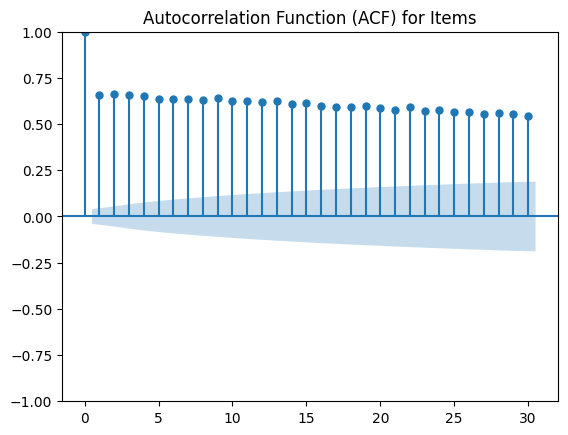

In [35]:
plot_acf(df[items_column], lags=30)  # You can adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF) for {}'.format(items_column))
plt.show()

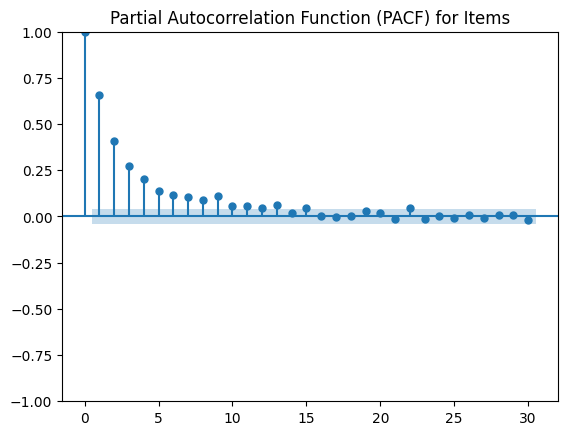

In [36]:
plot_pacf(df[items_column], lags=30)
plt.title('Partial Autocorrelation Function (PACF) for {}'.format(items_column))
plt.show()

In [ ]:
df.columns

Index(['Requested Delivery Date', 'Customer Country Code', 'Product Code',
       'Description', 'Order Type', 'Customer Order Code', 'Value', 'Currency',
       'Items', 'Route', 'Items First Difference', 'Seasonal Difference'],
      dtype='object')

In [37]:
df2 = df[['Order Date', 'Items']]

In [39]:
df2['Items_diff'] = df2['Items'].diff().dropna()


C:\Users\johns\AppData\Local\Temp\ipykernel_36480\3498238289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Items_diff'] = df2['Items'].diff().dropna()


In [40]:
from statsmodels.tsa.arima.model import ARIMA

# Replace the deprecated ARIMA with ARIMA from the new module
model = ARIMA(df2['Items_diff'], order=(1, 1, 1))
model_fit = model.fit()

# Continue with the rest of your analysis


c:\Users\johns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\johns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\johns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [42]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Items_diff   No. Observations:                 2421
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6506.954
Date:                Sun, 10 Dec 2023   AIC                          13019.907
Time:                        21:19:23   BIC                          13037.282
Sample:                             0   HQIC                         13026.225
                               - 2421                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5077      0.017    -29.080      0.000      -0.542      -0.473
ma.L1         -0.9998      0.040    -24.778      0.000      -1.079      -0.921
sigma2        12.5795      0.628     20.039      0.000      11.349      13.810
===================================================================================
Ljung-Box (L1) (Q):                  65.06   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.00   Prob(JB):                         0.77
Heteroskedasticity (H):               0.99   Skew:                             0.02
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\johns\AppData\Local\Temp\ipykernel_36480\1861541959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['forecast']=model_fit.predict(start=90,end=103,dynamic=True)


<Axes: >

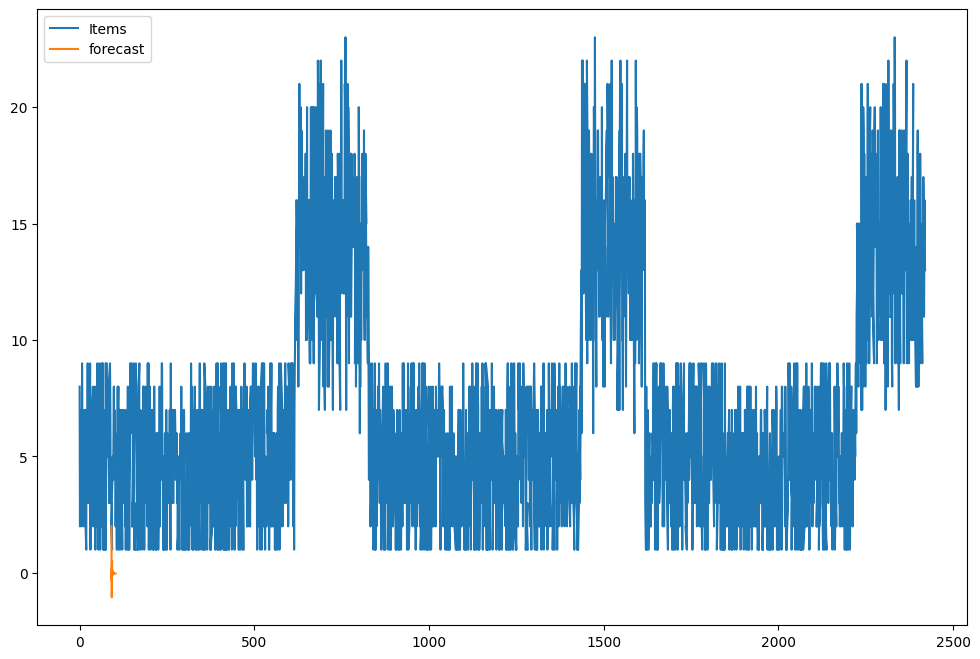

In [44]:
df2['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df2[['Items','forecast']].plot(figsize=(12,8))

c:\Users\johns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\johns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Items   No. Observations:                 2421
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6174.022
Date:                            Sun, 10 Dec 2023   AIC                          12358.044
Time:                                    21:30:13   BIC                          12386.977
Sample:                                         0   HQIC                         12368.568
                                           - 2421                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0135      0.021     -0.652      0.514      -0.054       0.027
ma.L1         -0.8608      0.010   

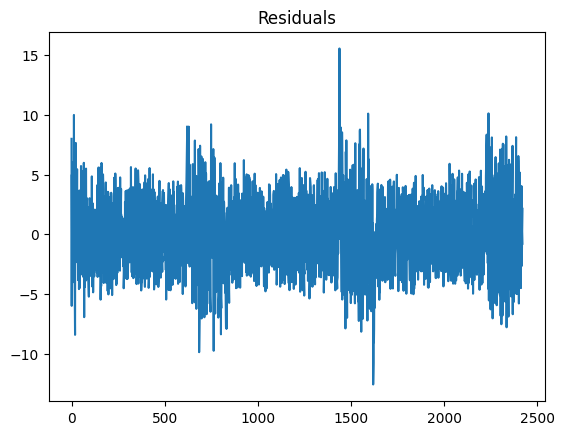

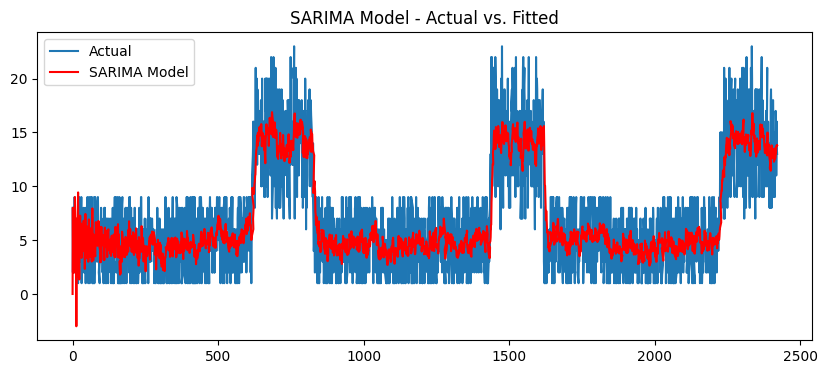

c:\Users\johns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\johns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


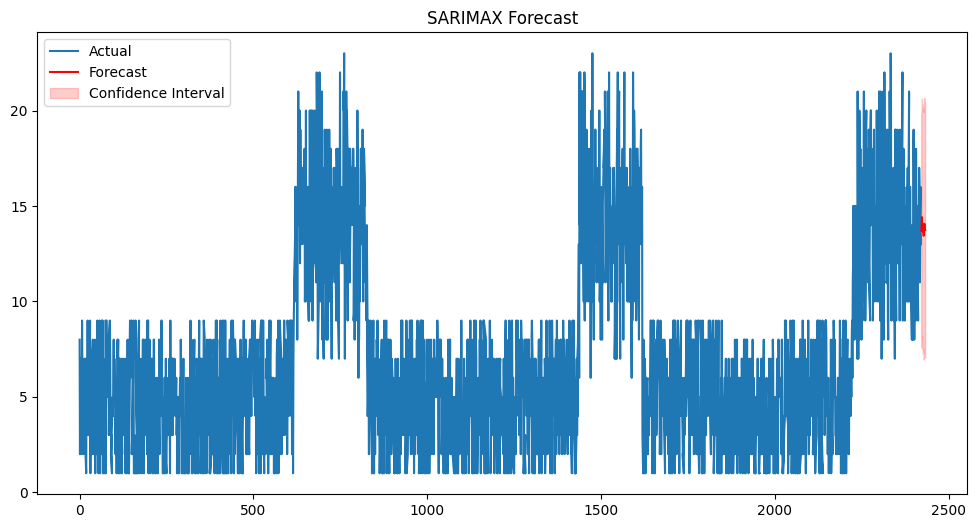

In [54]:
# Assuming p=1, d=1, q=1 based on ACF and PACF analysis
from statsmodels.tsa.api import SARIMAX
import matplotlib.pyplot as plt

# Specify the order of the SARIMA model based on your analysis
p, d, q = 1, 1, 1

# Specify the seasonal order (P, D, Q, s)
P, D, Q, s = 1, 1, 1, 12  # Adjust the seasonal order based on your analysis

# Build SARIMA model
sarima_model = SARIMAX(df['Items'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_results = sarima_model.fit()

# Print model summary
print(sarima_results.summary())

# Plot residuals
residuals = sarima_results.resid
residuals.plot(title='Residuals')
plt.show()

# Plot predicted vs. actual values
plt.figure(figsize=(10, 4))
plt.plot(df['Items'], label='Actual')
plt.plot(sarima_results.fittedvalues, color='red', label='SARIMA Model')
plt.title('SARIMA Model - Actual vs. Fitted')
plt.legend()
plt.show()

# Number of periods to forecast into the future
forecast_periods = 12  # Adjust as needed

# Make forecasts
forecast = sarima_results.get_forecast(steps=forecast_periods)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the original time series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Items'], label='Actual')
plt.plot(forecast_values, color='red', label='Forecast')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.2, label='Confidence Interval')
plt.title('SARIMAX Forecast')
plt.legend()
plt.show()


In [58]:
from datetime import datetime, timedelta
import pandas as pd

# Function to predict future values for a particular month and year
def predict_future_values(model, start_month, start_year, forecast_periods):
    # Create a datetime object for the specified start month and year
    start_date = datetime(start_year, start_month, 1)

    # Make forecasts
    forecast = model.get_forecast(steps=forecast_periods)

    # Extract forecasted values and confidence intervals
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()

    # Create a date index for the forecasted values
    forecast_index = pd.date_range(start=start_date, periods=forecast_periods, freq='MS')

    # Combine forecast values and confidence intervals into a DataFrame
    forecast_df = pd.DataFrame({
        'Forecast': forecast_values.values,
        'Lower CI': forecast_conf_int.iloc[:, 0].values,
        'Upper CI': forecast_conf_int.iloc[:, 1].values
    }, index=forecast_index)

    return forecast_df

# Test cases
# Assuming your model is already fitted (sarima_results)
# Specify the month and year for prediction
test_month = 2
test_year = 2026

# Number of periods to forecast into the future
forecast_periods = 12  # Adjust as needed

# Call the function to get the forecast for the specified month and year
forecast_df = predict_future_values(sarima_results, test_month, test_year, forecast_periods)

# Display the forecast DataFrame
print(forecast_df)


             Forecast  Lower CI   Upper CI
2026-02-01  13.702884  7.601121  19.804648
2026-03-01  13.811156  7.661360  19.960952
2026-04-01  14.417670  8.210875  20.624465
2026-05-01  13.781533  7.518393  20.044672
2026-06-01  13.853265  7.534276  20.172253
2026-07-01  13.639430  7.265081  20.013778
2026-08-01  13.896464  7.467233  20.325695
2026-09-01  13.441672  6.958023  19.925322
2026-10-01  13.623692  7.086077  20.161307
2026-11-01  14.073044  7.481905  20.664182
2026-12-01  13.804666  7.160435  20.448897
2027-01-01  13.741087  7.044184  20.437989


c:\Users\johns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\johns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [59]:
df.columns

Index(['Order Date', 'Requested Delivery Date', 'Customer Country Code',
       'Product Code', 'Description', 'Order Type', 'Customer Order Code',
       'Value', 'Currency', 'Items', 'Route', 'Items First Difference',
       'Seasonal Difference', 'forecast'],
      dtype='object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421 entries, 0 to 2420
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order Date               2421 non-null   datetime64[ns]
 1   Requested Delivery Date  2421 non-null   datetime64[ns]
 2   Customer Country Code    2421 non-null   object        
 3   Product Code             2421 non-null   object        
 4   Description              2421 non-null   object        
 5   Order Type               2421 non-null   object        
 6   Customer Order Code      2421 non-null   object        
 7   Value                    2421 non-null   float64       
 8   Currency                 2421 non-null   object        
 9   Items                    2421 non-null   int64         
 10  Route                    2421 non-null   object        
 11  Items First Difference   2420 non-null   float64       
 12  Seasonal Difference      2409 non-null 

In [62]:
print(df[['Value', 'Currency']].dtypes)


Value       float64
Currency     object
dtype: object


c:\Users\johns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\johns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\johns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Items   No. Observations:                 2421
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6173.957
Date:                            Sun, 10 Dec 2023   AIC                          12359.915
Time:                                    21:45:56   BIC                          12394.634
Sample:                                         0   HQIC                         12372.544
                                           - 2421                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Value          0.0003      0.001      0.351      0.725      -0.001       0.002
ar.L1         -0.0136      0.021   

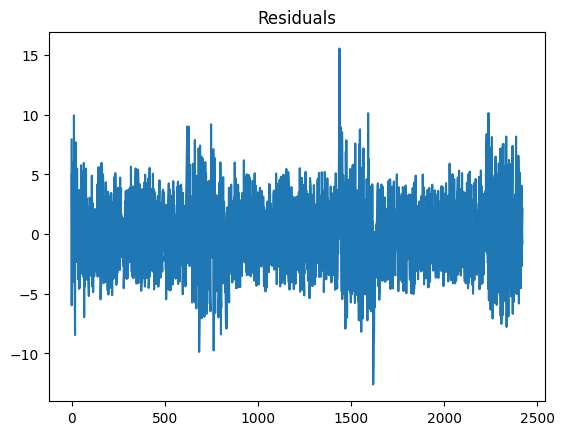

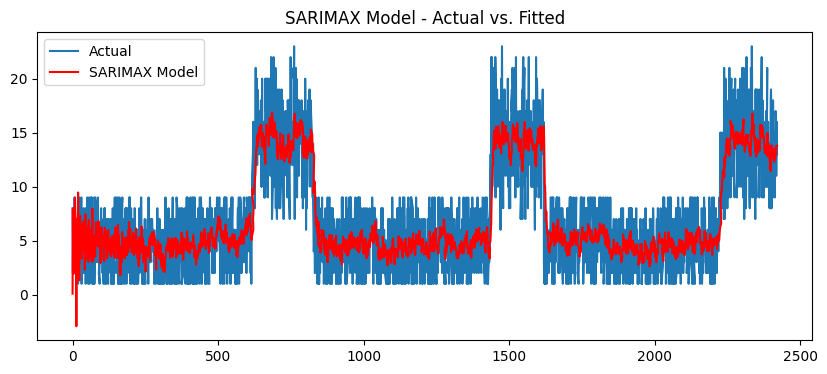

c:\Users\johns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\johns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


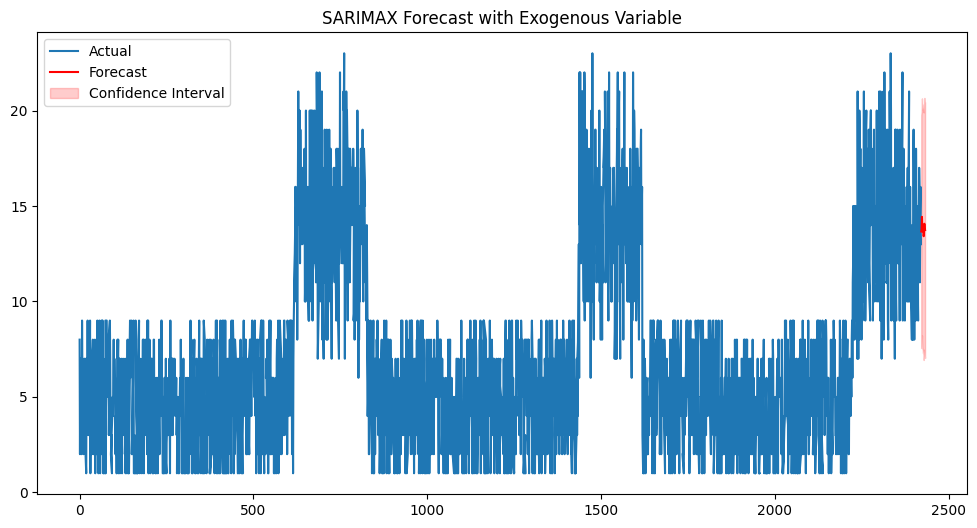

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming p=1, d=1, q=1 based on ACF and PACF analysis
p, d, q = 1, 1, 1

# Specify seasonal order (P, D, Q, s)
P, D, Q, s = 1, 1, 1, 12  # Adjust the seasonal order based on your analysis

# Select relevant exogenous variables based on your analysis
selected_exog_vars = ['Value']

# Build SARIMAX model with selected exogenous variables
sarimax_model = SARIMAX(df['Items'], exog=df[selected_exog_vars], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarimax_results = sarimax_model.fit()

# Print model summary
print(sarimax_results.summary())

# Plot residuals
residuals = sarimax_results.resid
residuals.plot(title='Residuals')
plt.show()

# Plot predicted vs. actual values
plt.figure(figsize=(10, 4))
plt.plot(df['Items'], label='Actual')
plt.plot(sarimax_results.fittedvalues, color='red', label='SARIMAX Model')
plt.title('SARIMAX Model - Actual vs. Fitted')
plt.legend()
plt.show()

# Number of periods to forecast into the future
forecast_periods = 12  # Adjust as needed

# Create exogenous variables for the forecast period
exog_forecast = df[selected_exog_vars].iloc[-forecast_periods:]

# Make forecasts with exogenous variables
forecast = sarimax_results.get_forecast(steps=forecast_periods, exog=exog_forecast)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the original time series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Items'], label='Actual')
plt.plot(forecast_values, color='red', label='Forecast')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.2, label='Confidence Interval')
plt.title('SARIMAX Forecast with Exogenous Variable')
plt.legend()
plt.show()


In [78]:


# Create a new column for the season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Requested Delivery Date'].dt.month.apply(get_season)

# Display the DataFrame with the new 'Season' column


In [79]:
df.head()

,Order Date,Requested Delivery Date,Customer Country Code,Description,Order Type,Customer Order Code,Value,Currency,Items,Route,Items First Difference,Seasonal Difference,forecast,Season_Spring,Season_Summer,Season_Winter,Product Code_PK002,Product Code_PK003,Product Code_PK004,Season
0,2009-01-01,2009-02-18,DE,Basic Parka,VO,COD00001,269.87,EUR,8,East,NaN,NaN,NaN,False,False,True,False,True,False,Winter
1,2009-01-01,2009-02-10,FR,Premium Parka,VO,COD00002,170.34,EUR,2,West,-6.0,NaN,NaN,False,False,True,False,False,False,Winter
2,2009-01-01,2009-01-17,ES,Basic Parka,VO,COD00003,61.09,EUR,7,West,5.0,NaN,NaN,False,False,True,True,False,False,Winter
3,2009-01-03,2009-01-28,IT,Advanced Parka,VO,COD00004,251.18,EUR,6,North,-1.0,NaN,NaN,False,False,True,False,True,False,Winter
4,2009-01-03,2009-01-18,DE,Premium Parka,VO,COD00005,153.33,EUR,5,West,-1.0,NaN,NaN,False,False,True,False,False,True,Winter


In [80]:
df['Advance Orders'] = (df['Requested Delivery Date'] - df['Order Date']).dt.days

KeyError: 'Order\xa0Date'

In [77]:
df['Season'] = df['Season'].astype('category')
df['Product Code'] = df['Product Code'].astype('category')

# Encode categorical variables
df = pd.get_dummies(df, columns=['Season', 'Product Code'], drop_first=True)

# Define independent variables (features) and dependent variable
X = df.drop(['Order Date', 'Demand'], axis=1)  # Independent variables
y = df['Demand']  # Dependent variable

# Add a constant term to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display model summary
print(model.summary())

KeyError: 'Season'